# DBI Project Student
#### Student alcohol consumption dataset
[Link to source](https://www.kaggle.com/uciml/student-alcohol-consumption)
Walc...alcohol consumed on weekend
Dalc...alcohol consumed on workday

[Link to academic 
portuguese grading system](https://en.wikipedia.org/wiki/Academic_grading_in_Portugal)
Basically G1, G2, G3 are test scores from 0(bad) to 20(excellent)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data/student-mat.csv', sep=',')
#not working
#df.drop(['school', 'guardian', 'traveltime', 'famsize', 'activities', 'famsup', 'schoolsup'])

### Columns

In [3]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### Examples

In [4]:
#Numeric types
df.select_dtypes(include='number').head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [5]:
df.select_dtypes(exclude='number').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


### Statistics

In [6]:
df.select_dtypes(include='number').describe()
#only numeric values are shown

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
# Unused data
df.select_dtypes(exclude='number').describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


### Age distribution

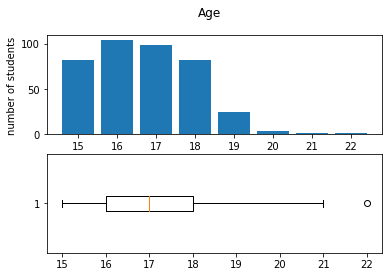

In [8]:
age_data = df["age"].to_numpy()
age_label, age_value = np.unique(age_data, return_counts=True)

plt.gcf()
plt.suptitle('Age')

plt.subplot(2,1,1)
plt.bar(age_label.astype(str), age_value)
plt.ylabel("number of students")

plt.subplot(2,1,2)
plt.boxplot(df.age, vert=False)
plt.show()

### Performence with relate to alcohol consumption

0       red
1       red
2       red
3       red
4       red
       ... 
390    blue
391    blue
392    blue
393    blue
394    blue
Name: sex, Length: 395, dtype: object


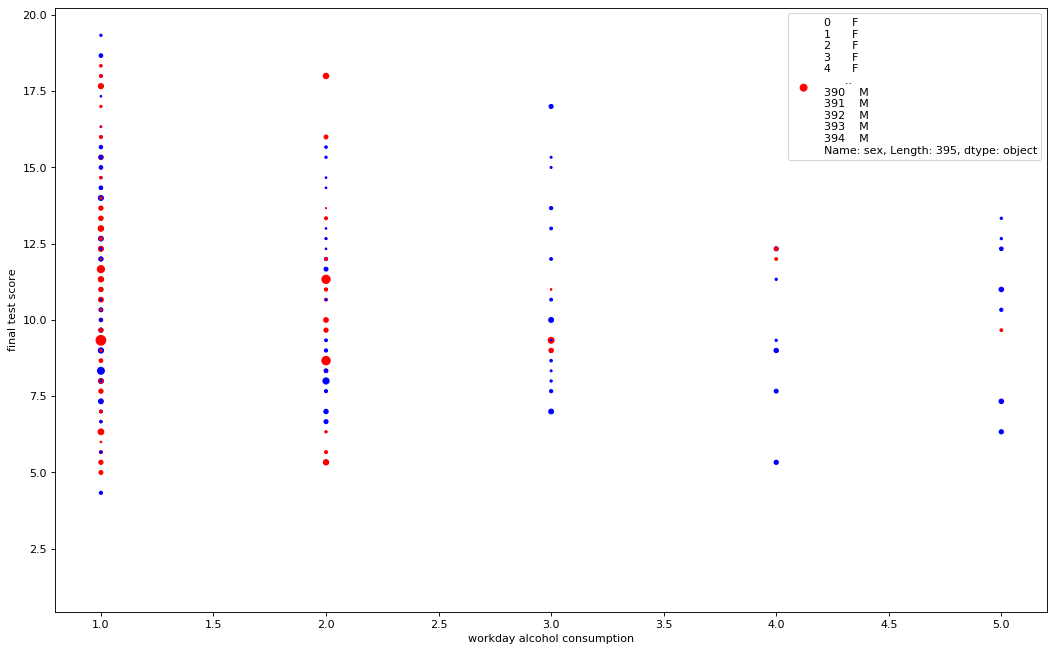

In [67]:
plt.figure(figsize=(16,10), dpi=80, facecolor='w', edgecolor='k')

colorDict={0: 'red', 1: 'blue'}
print((df.sex=='M').astype(int).map(colorDict))
plt.scatter(df.Dalc, df[["G1","G2", "G3"]].mean(axis=1),\
    c=(df.sex=='M').astype(int).map(colorDict),\
    label=df.sex,\
    s=df.absences)

plt.gca().set(xlabel="workday alcohol consumption", \
ylabel="final test score")
plt.legend()

### ML Part

In [69]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

predicted_col = 'G3'

In [70]:
dataset = df.select_dtypes(include='number')

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

dataset_stats = dataset.describe()
dataset_stats.pop(predicted_col)
dataset_stats = dataset_stats.transpose()

train_labels = train_dataset.pop(predicted_col)
test_labels = test_dataset.pop(predicted_col)
# TODO put lower without harming stucture
train_dataset.shape

(316, 15)

In [71]:


def norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']
train_normed = norm(train_dataset)
test_normed = norm(test_dataset)
train_normed.shape

(316, 15)

In [72]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(10e-5)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [73]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,409
Trainable params: 9,409
Non-trainable params: 0
______________________________________________________

In [74]:
EPOCHS = 1500

history = model.fit(
  np.asarray(train_normed), np.asarray(train_labels),
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])




Epoch: 0, loss:130.2322,  mae:10.4084,  mse:130.2322,  val_loss:147.7390,  val_mae:11.4480,  val_mse:147.7390,  
....................................................................................................
Epoch: 100, loss:7.8548,  mae:2.1055,  mse:7.8548,  val_loss:6.6999,  val_mae:1.8894,  val_mse:6.6999,  
....................................................................................................
Epoch: 200, loss:3.5982,  mae:1.3903,  mse:3.5982,  val_loss:5.2404,  val_mae:1.6663,  val_mse:5.2404,  
....................................................................................................
Epoch: 300, loss:1.8903,  mae:0.9800,  mse:1.8903,  val_loss:4.8613,  val_mae:1.6118,  val_mse:4.8613,  
....................................................................................................
Epoch: 400, loss:0.9429,  mae:0.6624,  mse:0.9429,  val_loss:4.6153,  val_mae:1.5782,  val_mse:4.6153,  
..............................................................

In [75]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1495,0.003379,0.042744,0.003379,5.133152,1.792807,5.133152,1495
1496,0.000375,0.014647,0.000375,5.114913,1.789095,5.114913,1496
1497,0.006428,0.071259,0.006428,5.133450,1.793911,5.133450,1497
1498,0.001246,0.027291,0.001246,5.122925,1.791242,5.122925,1498
1499,0.005020,0.061609,0.005020,5.125857,1.792766,5.125857,1499


Text(0, 0.5, 'MAE [MPG]')

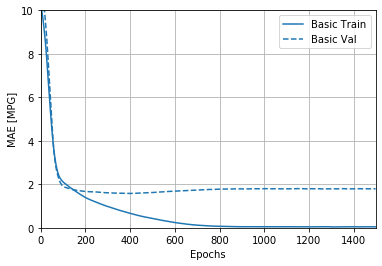

In [76]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [77]:
test_predictions = model.predict(np.asarray(test_normed)).flatten()

In [78]:
m = tf.keras.metrics.MeanSquaredError(dtype=tf.float32)
m.update_state(np.asarray(test_labels), np.asarray(test_predictions))
m.result().numpy()

5.248351

In [79]:
def getAustrianGrade(portugese):
    #21 portugese "grades" #5 austrian grades
    percent = portugese * 5
    if percent > 90:
        return 1
    elif percent > 78:
        return 2
    elif percent > 60:
        return 3
    elif percent > 50:
        return 4
    return 5

In [80]:
comparisons = zip(np.array(test_labels), np.array(test_predictions))
for comparison in comparisons:
    print(getAustrianGrade(comparison[0]), getAustrianGrade(comparison[1]))

3 2
5 5
4 4
2 2
2 2
4 3
3 3
2 1
1 1
4 3
3 3
3 3
5 5
5 5
5 4
3 2
5 4
2 2
5 5
4 3
2 2
3 3
3 3
3 1
5 5
5 5
5 5
4 4
3 3
5 5
4 3
5 3
5 4
5 5
5 5
4 4
5 5
5 5
3 3
5 5
5 5
5 5
3 4
5 5
4 3
5 5
5 5
4 3
4 4
2 2
4 5
3 3
5 5
4 4
3 2
4 4
3 3
3 4
3 3
5 4
3 3
5 5
3 1
5 5
2 2
4 4
3 2
3 3
5 5
5 5
4 4
2 2
4 3
3 3
5 5
5 5
5 4
5 5
5 2
